In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
statistics = []

for i in range(100):
    df = pd.read_csv('k_from_1_to_9.csv')
    df_filtered = df[(df['k'] >= 1) & (df['k'] <= 6) & (df['t'] == i)]

    X_noisy = df_filtered['x_noisy'].values
    X_exact = df_filtered['x_exact'].values
    k = df_filtered['k'].values

    X_features = np.column_stack([
        X_noisy**2,
        k * X_noisy,
        k**2,
        k,
        X_noisy,
        np.ones_like(X_noisy)
    ])

    model = LinearRegression()
    model.fit(X_features, X_exact)

    regression = []

    for n in range(26):
        m = n + 1
        df = pd.read_csv('k_from_1_to_9.csv')
        df_filtered = df[(df['k'] == m) & (df['t'] == i)]

        X = df_filtered['x_noisy']
        y = df_filtered['x_exact']

        noisy_value = X.mean() if not X.empty else 0
        k_val = m

        X_input = np.array([
            noisy_value**2,
            k_val * noisy_value,
            k_val**2,
            k_val,
            noisy_value,
            1.0
        ]).reshape(1, -1)

        y_pred = model.predict(X_input)[0]
        print(y_pred)
        regression.append(y_pred)

    noisy_value = -2.92779869091894
    k_val = 27
    X_input = np.array([
        noisy_value**2,
        k_val * noisy_value,
        k_val**2,
        k_val,
        noisy_value,
        1.0
    ]).reshape(1, -1)
    y_pred = model.predict(X_input)[0]
    print(y_pred)
    regression.append(y_pred)

    statistics.append(regression)

-3.521482602518603
-3.521415723972723
-3.521533807605266
-3.5212738865649555
-3.5211385832774624
-3.5207989253591734
-3.520994460755844
-3.5210062824143904
-3.520742050630048
-3.5205946539255137
-3.52045577041784
-3.5204694767133446
-3.520365462772588
-3.520570665494745
-3.520212103867806
-3.520050952502629
-3.519888098782303
-3.5198934350050877
-3.5197350291771556
-3.5194424888321123
-3.5193153854249033
-3.519193175115049
-3.5191111333865024
-3.5191019683651916
-3.518960140779541
-3.5189341102392575
-3.518952609261703
-3.5231735983673502
-3.5220829598096373
-3.521252529703446
-3.5206691805102395
-3.5205280982832363
-3.520794889652464
-3.521365726214796
-3.522170271014886
-3.523341442917612
-3.5248126216185653
-3.5265791000342404
-3.5287126984479897
-3.531023834855887
-3.5337099497012474
-3.5367199575812975
-3.5399948914670887
-3.543561852715996
-3.5473953808280783
-3.551559608621261
-3.5559676676017062
-3.5606792757119052
-3.565699116379136
-3.570982957894657
-3.5766102654613263
-3.58

In [3]:
transposed = list(map(list, zip(*statistics)))
avg = []
for i in range(27):
    average = np.mean(transposed[i])
    avg.append(average)
print(avg)

[np.float64(-3.522363008750044), np.float64(-3.521620519999291), np.float64(-3.521104549742659), np.float64(-3.520838697257217), np.float64(-3.5208140971090383), np.float64(-3.521022289871475), np.float64(-3.521486792720834), np.float64(-3.522227023395918), np.float64(-3.5231975657316936), np.float64(-3.5244484582144726), np.float64(-3.5259226781520487), np.float64(-3.527613344886816), np.float64(-3.5295534256486434), np.float64(-3.53174768901747), np.float64(-3.5341426485583503), np.float64(-3.536781877205415), np.float64(-3.5396589946686317), np.float64(-3.5427564678218006), np.float64(-3.546069108263689), np.float64(-3.5496093950533862), np.float64(-3.5534246993007605), np.float64(-3.5574537018409296), np.float64(-3.5617185740848836), np.float64(-3.5662691958974064), np.float64(-3.5710662934214197), np.float64(-3.5761276881764483), np.float64(-3.5814621004628555)]


In [ ]:
df = pd.read_csv('k_from_1_to_9.csv')

avg_noisy = []
avg_exact = []
for i in range(27):
    df_filtered = df[(df['k'] == i)]
    X_noisy = df_filtered['x_noisy'].values
    X_noisy_avg = np.mean(X_noisy)
    avg_noisy.append(X_noisy_avg)
    X_exact = df_filtered['x_exact'].values
    X_exact_avg = np.mean(X_exact)
    avg_exact.append(X_exact_avg)

avg_noisy.append(-2.92779869091894)
avg_exact.append(-3.712209125939833)
print(avg_noisy)
print(avg_exact)

[np.float64(nan), np.float64(-2.9796646589562203), np.float64(-2.976854789579294), np.float64(-2.973989701325264), np.float64(-2.971148599941092), np.float64(-2.9683013812853187), np.float64(-2.965409689541391), np.float64(-2.9625606121867993), np.float64(-2.959877739451908), np.float64(-2.9571390616797917), np.float64(-2.954626212733218), np.float64(-2.9522040099402855), np.float64(-2.949720654175994), np.float64(-2.947389118828443), np.float64(-2.9452649956951733), np.float64(-2.9430829969756718), np.float64(-2.9413085391478595), np.float64(-2.9394855013027748), np.float64(-2.9377667189053795), np.float64(-2.936234012798024), np.float64(-2.9347643885623333), np.float64(-2.933436718412356), np.float64(-2.9322682583976833), np.float64(-2.9311291050210713), np.float64(-2.9301832333270785), np.float64(-2.9293059804685635), np.float64(-2.928509766668434), -2.92779869091894]
[np.float64(nan), np.float64(-3.522869627196869), np.float64(-3.5234346982932507), np.float64(-3.523847483049289), n

/opt/miniconda3/envs/quantum/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/quantum/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


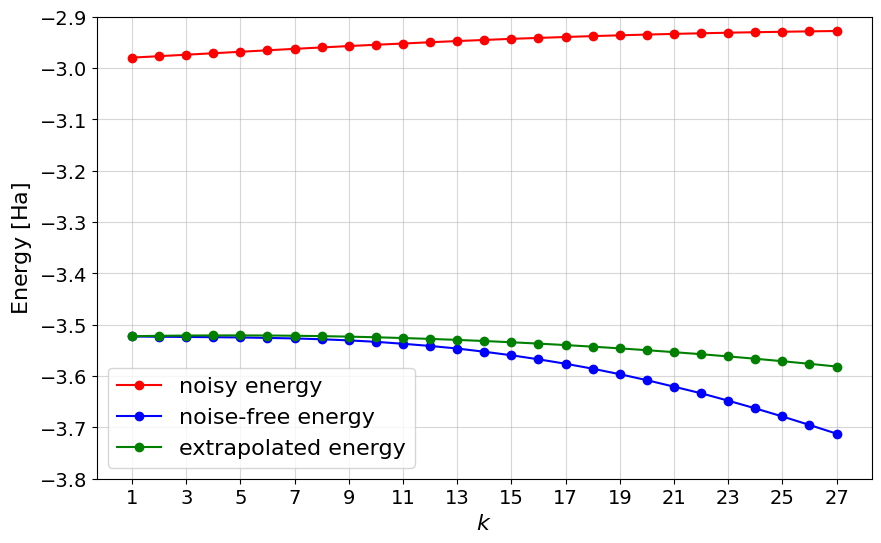

In [ ]:
x_linear = np.arange(0, 28) 
x_others = np.arange(0, 28)
x_reg = np.arange(1, 28)

plt.figure(figsize=(10, 6))
plt.plot(x_linear, avg_noisy, label='noisy energy', linestyle='-', marker='o', color='r')
plt.plot(x_others, avg_exact, label='noise-free energy', linestyle='-', marker='o', color='b')
plt.plot(x_reg, avg, label='extrapolated energy', linestyle='-', marker='o', color='g')

#plt.plot(x_linear, noisy, label="noisy value")

plt.ylim(-3.8, -2.9)

#plt.title('Absolute Energy Error', fontsize=16)
plt.xlabel(r'$k$', fontsize=16)
plt.ylabel(r'Energy $[\mathrm{Ha}]$', fontsize=16)
plt.legend(fontsize=16)
plt.grid(alpha=0.5)
plt.xticks(range(1, 28, 2),fontsize=14) 
plt.yticks(fontsize=14)

#plt.tight_layout()
plt.show()